<a href="https://colab.research.google.com/github/maha022000/MAHALAKSHMI/blob/Data-science--projects/Random_Forest_python_program.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Q1. Problem Statement: Random Forest
Write a Python program that reads the TaxiFare.csv (provided on LMS) file
into a DataFrame and build a good random forest model by performing
the following tasks:
1. Load the TaxiFare.csv dataset into a DataFrame
2. Drop ‘unique_id’, and find missing values from the dataset
3. Convert the ‘date_time_of_pickup’ column to date and time format
and extract information and create new columns as ‘hour‘,
‘dayOfTheMonth’,’ month’, ‘dayOfTheWeek’.
4. Find traveling distance based on given coordinates using the
"Haversine" distance formula and create a new column as ‘distance’
and store the data.
Note: The Haversine formula calculates the shortest distance between
two points on a sphere using their latitudes and longitudes measured
along the surface. It is important for use in navigation.
Formula:
d = 2r 𝑠𝑖𝑛−1√𝑠𝑖𝑛2(
𝜙2−𝜙1
2
) + cos (𝜙2)cos (𝜙1)𝑠𝑖𝑛2(
𝜆2−𝜆1
2
)
where,
𝜙2 − 𝜙1 (difference of latitude)
2
𝜆2 − 𝜆1 (difference of longitude)
r is radius of earth i.e 6371 KM or 3961 miles
and d is the distance computed between two points
5. Eliminate some anomalous/outlier data based on certain "Domain" logic
A. Amount < 2.5 as the minimum fare is 2.5
B. Trips with travel distance less than or equal to 1, and more than
130 Kms. Let’s say this was a condition provided by clients
based on travel range.
6. Extract independent variables (Xs) and dependent variables (Ys) into
separate data objects
7. Find important features using random forest.
8. Build a model and predict the result for the test dataset based on
MAPE and RMSE.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from statsmodels.api import add_constant, OLS
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score
from io import StringIO

 Load data set into dataframe.

In [ ]:
df=pd.read_csv("TaxiFare.csv")
df.head(10)

,unique_id,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,amount
0,26:21.0,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1,4.5
1,52:16.0,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1,16.9
2,35:00.0,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2,5.7
3,30:42.0,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1,7.7
4,51:00.0,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1,5.3
5,50:45.0,2011-01-06 09:50:45 UTC,-74.000964,40.731630,-73.972892,40.758233,1,12.1
6,35:00.0,2012-11-20 20:35:00 UTC,-73.980002,40.751662,-73.973802,40.764842,1,7.5
7,22:00.0,2012-01-04 17:22:00 UTC,-73.951300,40.774138,-73.990095,40.751048,1,16.5
8,10:00.0,2012-12-03 13:10:00 UTC,-74.006462,40.726713,-73.993078,40.731628,1,9.0
9,11:00.0,2009-09-02 01:11:00 UTC,-73.980658,40.733873,-73.991540,40.758138,2,8.9


Drop unwanted columns from the dataset

In [ ]:
df = df.drop("unique_id",axis = 1)

df.describe()

,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,amount
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,-72.509756,39.933759,-72.504616,39.926251,1.667840,11.364171
std,10.393860,6.224857,10.407570,6.014737,1.289195,9.685557
min,-75.423848,-74.006893,-84.654241,-74.006377,0.000000,-5.000000
25%,-73.992062,40.734880,-73.991152,40.734372,1.000000,6.000000
50%,-73.981840,40.752678,-73.980082,40.753372,1.000000,8.500000
75%,-73.967148,40.767360,-73.963584,40.768167,2.000000,12.500000
max,40.783472,401.083332,40.851027,43.415190,6.000000,200.000000


Missing value analysis

In [ ]:
df.isnull().sum()

df.info

<bound method DataFrame.info of            date_time_of_pickup  longitude_of_pickup  latitude_of_pickup  \
0      2009-06-15 17:26:21 UTC           -73.844311           40.721319   
1      2010-01-05 16:52:16 UTC           -74.016048           40.711303   
2      2011-08-18 00:35:00 UTC           -73.982738           40.761270   
3      2012-04-21 04:30:42 UTC           -73.987130           40.733143   
4      2010-03-09 07:51:00 UTC           -73.968095           40.768008   
...                        ...                  ...                 ...   
49995  2013-06-12 23:25:15 UTC           -73.999973           40.748531   
49996  2015-06-22 17:19:18 UTC           -73.984756           40.768211   
49997  2011-01-30 04:53:00 UTC           -74.002698           40.739428   
49998  2012-11-06 07:09:00 UTC           -73.946062           40.777567   
49999  2010-01-13 08:13:14 UTC           -73.932603           40.763805   

       longitude_of_dropoff  latitude_of_dropoff  no_of_passenger  

Making new features based on old features

In [ ]:
df["date_time_of_pickup"] = pd.to_datetime(df["date_time_of_pickup"])
new_df = df.assign(hour = df["date_time_of_pickup"].dt.hour, 
                  dayOfTheMonth = df["date_time_of_pickup"].dt.day,
                  month = df["date_time_of_pickup"].dt.month, 
                  dayOfTheWeek = df["date_time_of_pickup"].dt.dayofweek)

In [ ]:
# Remove date_time_of_pickup
new_df.drop("date_time_of_pickup", axis = 1, inplace = True)

new_df.head()

new_df.shape

(50000, 10)

Find traveling distance based on given coordinates using "Haversine" distance formula.

In [ ]:
def haversine_np(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points
    on the earth (specified in decimal degrees)

    All args must be of equal length.    

    """
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2

    c = 2 * np.arcsin(np.sqrt(a))
    km = 6367 * c # 6367 is radius of earth in kilometers.
    return km

new_df["distance"] = haversine_np(new_df["longitude_of_pickup"], new_df["latitude_of_pickup"],
                                   new_df["longitude_of_dropoff"], new_df["latitude_of_dropoff"])

new_df.head()


,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,amount,hour,dayOfTheMonth,month,dayOfTheWeek,distance
0,-73.844311,40.721319,-73.841610,40.712278,1,4.5,17,15,6,0,1.030117
1,-74.016048,40.711303,-73.979268,40.782004,1,16.9,16,5,1,1,8.444828
2,-73.982738,40.761270,-73.991242,40.750562,2,5.7,0,18,8,3,1.388653
3,-73.987130,40.733143,-73.991567,40.758092,1,7.7,4,21,4,5,2.797513
4,-73.968095,40.768008,-73.956655,40.783762,1,5.3,7,9,3,1,1.997902


Eliminate some anamolous/outlier data based on certain "Domain" logic

A. Amount < 2.5 as the minimum fare is $2.5

B. Trips with travel distance less than or equal to 1, and more than 130Kms. Lets say this was a condition range(just a hypothesis but not necessary to do it).

In [ ]:
new_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
longitude_of_pickup,50000.0,-72.509756,10.393860,-75.423848,-73.992062,-73.981840,-73.967148,40.783472
latitude_of_pickup,50000.0,39.933759,6.224857,-74.006893,40.734880,40.752678,40.767360,401.083332
longitude_of_dropoff,50000.0,-72.504616,10.407570,-84.654241,-73.991152,-73.980082,-73.963584,40.851027
latitude_of_dropoff,50000.0,39.926251,6.014737,-74.006377,40.734372,40.753372,40.768167,43.415190
no_of_passenger,50000.0,1.667840,1.289195,0.000000,1.000000,1.000000,2.000000,6.000000
amount,50000.0,11.364171,9.685557,-5.000000,6.000000,8.500000,12.500000,200.000000
hour,50000.0,13.489080,6.506935,0.000000,9.000000,14.000000,19.000000,23.000000
dayOfTheMonth,50000.0,15.672040,8.660789,1.000000,8.000000,16.000000,23.000000,31.000000
month,50000.0,6.273300,3.461157,1.000000,3.000000,6.000000,9.000000,12.000000
dayOfTheWeek,50000.0,3.029980,1.956936,0.000000,1.000000,3.000000,5.000000,6.000000


In [ ]:
# A. Amount < 2.5 as the minimum fare is $2.5
print(new_df["amount"].describe())
fullRaw = new_df[new_df["amount"] >= 2.5]
print(new_df["amount"].describe())

count    50000.000000
mean        11.364171
std          9.685557
min         -5.000000
25%          6.000000
50%          8.500000
75%         12.500000
max        200.000000
Name: amount, dtype: float64
count    50000.000000
mean        11.364171
std          9.685557
min         -5.000000
25%          6.000000
50%          8.500000
75%         12.500000
max        200.000000
Name: amount, dtype: float64


In [ ]:
# B. Trips with travel distance greater than or equal to 1, and less than 130Kms.
print(new_df["distance"].describe())
new_df = new_df[(new_df["distance"] >= 1) & (new_df["distance"] <= 130)]
print(new_df["distance"].describe())

count    50000.000000
mean        18.497326
std        355.341070
min          0.000000
25%          1.222378
50%          2.118783
75%          3.893124
max       8662.376766
Name: distance, dtype: float64
count    40926.000000
mean         3.919168
std          4.491177
min          1.000150
25%          1.662453
50%          2.576932
75%          4.490593
max        129.868894
Name: distance, dtype: float64


In [ ]:
new_df.shape

(40926, 11)

Extract independent variables (Xs) and dependent variables (Ys) into separate data objects.


In [ ]:
x = new_df.drop(["amount"], axis = 1).copy()
y = new_df["amount"].copy()
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.20,random_state=100) 
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(32740, 10)
(8186, 10)
(32740,)
(8186,)


Model building.

In [ ]:
from sklearn.ensemble import RandomForestRegressor

M1 = RandomForestRegressor(random_state=123)
M1 = M1.fit(x_train,y_train) # Indep, Dep variable


Feature Importance

In [ ]:
varImpDf = pd.DataFrame()
varImpDf["Importance"] = M1.feature_importances_
varImpDf["Variable"] = x_train.columns
varImpDf.sort_values("Importance", ascending = False, inplace = True)


In [ ]:
varImpDf.head()

,Importance,Variable
9,0.833108,distance
2,0.046062,longitude_of_dropoff
3,0.033203,latitude_of_dropoff
0,0.026619,longitude_of_pickup
1,0.019757,latitude_of_pickup


Prediction on test data

In [ ]:
# Model Prediction on Testset

testPredDf = pd.DataFrame()

testPredDf["Prediction"] = M1.predict(x_test)

In [ ]:
# Create a column to store actuals
testPredDf["Actual"] = y_test.values


In [ ]:
# Validate if the above worked
testPredDf.head()

,Prediction,Actual
0,13.2817,15.5
1,9.1810,10.0
2,8.3820,8.0
3,6.1400,5.0
4,15.7530,21.0


*Evaluate score based on RMSE and MAPE

In [ ]:
# RMSE
print("RMSE",np.sqrt(np.mean((testPredDf["Actual"] - testPredDf["Prediction"])**2)))
# This means on an "average", the taxi fare prediction would have +/- error of about $4.24
# Lower the RMSE, better the model prediction

RMSE 4.249447879749447


In [ ]:
# MAPE
print("MAPE",(np.mean(np.abs(((testPredDf["Actual"] - testPredDf["Prediction"])/testPredDf["Actual"]))))*100)
# This means on an "average", the taxi fare prediction would have +/- error of ~18%
# Lower the MAPE, better the model prediction


MAPE 18.924176905704467


Q2. Problem Statement: Performance Measurements
Write a Python program that reads the h1n1_vaccine_prediction.csv
(provided on LMS) file into a DataFrame and build a good random forest
model by performing the following tasks:
1. Load the h1n1_vaccine_prediction.csv dataset into a DataFrame
2. Do value count for the dependent variable, and check if the data is
imbalanced or not.
3. Drop columns that have more than 50% missing data. And then drop
all null values
4. Print a Bar plot for the dependent variable for all categories
5. Do label encoding for all categorical features
6. Extract independent variables (Xs) and dependent variables (Ys) into
separate data objects
5
7. Build a random forest model and evaluate it on test data.
8. Do oversample and then build another random forest model for test
data and compare their accuracy.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing  import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from imblearn.over_sampling import SMOTE
from matplotlib.colors import ListedColormap
from sklearn import metrics
import seaborn as sns

Load dataset into dataframe

In [ ]:
df1 = pd.read_csv("h1n1_vaccine_prediction.csv")
df1.head()

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0


Data distribution of target variable.

In [ ]:
df1.h1n1_vaccine.value_counts()


0    21033
1     5674
Name: h1n1_vaccine, dtype: int64

In [ ]:
df1.shape

(26707, 34)

*Missing value analysis

In [ ]:
df1.isnull().sum()/len(df1)*100

unique_id                     0.000000
h1n1_worry                    0.344479
h1n1_awareness                0.434343
antiviral_medication          0.265848
contact_avoidance             0.778822
bought_face_mask              0.071142
wash_hands_frequently         0.157262
avoid_large_gatherings        0.325757
reduced_outside_home_cont     0.307036
avoid_touch_face              0.479275
dr_recc_h1n1_vacc             8.087767
dr_recc_seasonal_vacc         8.087767
chronic_medic_condition       3.635751
cont_child_undr_6_mnths       3.070356
is_health_worker              3.010447
has_health_insur             45.957989
is_h1n1_vacc_effective        1.464036
is_h1n1_risky                 1.452803
sick_from_h1n1_vacc           1.479013
is_seas_vacc_effective        1.729884
is_seas_risky                 1.924589
sick_from_seas_vacc           2.010709
age_bracket                   0.000000
qualification                 5.268282
race                          0.000000
sex                      

In [ ]:
df1 = df1.drop("has_health_insur",axis = 1) # drop this column because it has more than 45% dat is missing
df1 = df1.dropna()
df1.shape

(19642, 33)

check balance of target variable

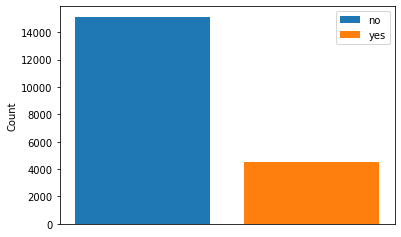

In [ ]:
#Is Data Balanced?
purchased=df1[df1.h1n1_vaccine==0].h1n1_vaccine.count()
notpurchased=df1[df1.h1n1_vaccine==1].h1n1_vaccine.count()
plt.bar(0,purchased,label='no')
plt.bar(1,notpurchased,label='yes')
plt.xticks([])
plt.ylabel('Count')
plt.legend()
plt.show()

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19642 entries, 0 to 26706
Data columns (total 33 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   unique_id                  19642 non-null  int64  
 1   h1n1_worry                 19642 non-null  float64
 2   h1n1_awareness             19642 non-null  float64
 3   antiviral_medication       19642 non-null  float64
 4   contact_avoidance          19642 non-null  float64
 5   bought_face_mask           19642 non-null  float64
 6   wash_hands_frequently      19642 non-null  float64
 7   avoid_large_gatherings     19642 non-null  float64
 8   reduced_outside_home_cont  19642 non-null  float64
 9   avoid_touch_face           19642 non-null  float64
 10  dr_recc_h1n1_vacc          19642 non-null  float64
 11  dr_recc_seasonal_vacc      19642 non-null  float64
 12  chronic_medic_condition    19642 non-null  float64
 13  cont_child_undr_6_mnths    19642 non-null  flo

Do label encoding for each catagorical data.

In [ ]:
from sklearn import preprocessing
df1.age_bracket.unique() # we need to replce age bracate with labes
le = preprocessing.LabelEncoder()
df1['age_bracket'] = le.fit_transform(df1.age_bracket.values)
df1['age_bracket']

0        3
1        1
3        4
4        2
5        4
        ..
26700    3
26701    0
26702    4
26703    0
26706    4
Name: age_bracket, Length: 19642, dtype: int64

In [ ]:
df1.qualification = le.fit_transform(df1.qualification.values)
df1.qualification

0        1
1        0
3        0
4        3
5        0
        ..
26700    0
26701    2
26702    3
26703    2
26706    3
Name: qualification, Length: 19642, dtype: int64

In [ ]:
df1.race = le.fit_transform(df1.race.values)
df1.sex = le.fit_transform(df1.sex.values)
df1.income_level = le.fit_transform(df1.income_level.values)
df1.marital_status = le.fit_transform(df1.marital_status.values)
df1.housing_status = le.fit_transform(df1.housing_status.values)
df1.employment = le.fit_transform(df1.employment.values)
df1.census_msa = le.fit_transform(df1.census_msa.values)
df1 # all column converted to numeric data

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,3,0,2,1,0,1,2,0.0,0.0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,3,1,2,1,1,0,0,0.0,0.0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,3,0,2,1,1,1,1,0.0,0.0,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,3,0,0,0,0,0,0,1.0,0.0,0
5,5,3.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,3,1,0,0,0,0,1,2.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26700,26700,3.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,3,0,1,0,0,1,1,1.0,0.0,0
26701,26701,2.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,3,0,1,1,1,1,1,3.0,0.0,0
26702,26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,3,0,0,1,0,1,2,0.0,0.0,0
26703,26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,3,1,0,1,1,0,1,1.0,0.0,0


Extract independent variables (Xs) and dependent variables (Ys) into separate data objects.

In [ ]:
x= df1.drop("h1n1_vaccine",axis = 1) #independent feature
y= df1['h1n1_vaccine'] # dependent feature

Model building before applying SMOTE

In [ ]:
#before smot
x_train,x_test,y_train,y_test=train_test_split(x, y,test_size=0.20)
clf = RandomForestClassifier(n_estimators = 100)
clf.fit(x_train, y_train)

RandomForestClassifier()

In [ ]:
# performing predictions on the test dataset
y_pred = clf.predict(x_test)
# metrics are used to find accuracy or error
from sklearn import metrics 
print()
score2 =  metrics.accuracy_score(y_test, y_pred)
# using metrics module for accuracy calculation
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))


ACCURACY OF THE MODEL:  0.8182743700687197


Model building after applying SMOTE

In [ ]:
#Over sampling the dataset
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
x_smot, y_smot = oversample.fit_resample(x, y)

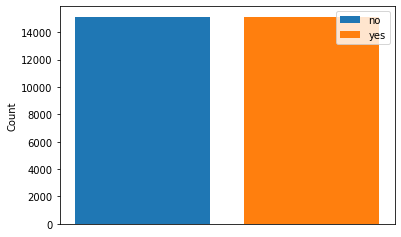

In [ ]:
# after smot all class are equale.
purchased=y_smot[y_smot==0].count()
notpurchased=y_smot[y_smot==1].count()
plt.bar(0,purchased,label='no')
plt.bar(1,notpurchased,label='yes')
plt.xticks([])
plt.ylabel('Count')
plt.legend()
plt.show()


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x_smot, y_smot,test_size=0.20)

clf = RandomForestClassifier(n_estimators = 100)
clf.fit(x_train, y_train)

RandomForestClassifier()

In [ ]:
# performing predictions on the test dataset
y_pred = clf.predict(x_test)

In [ ]:
# metrics are used to find accuracy or error
from sklearn import metrics 
print()
score2 =  metrics.accuracy_score(y_test, y_pred)

In [ ]:
# using metrics module for accuracy calculation
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))


ACCURACY OF THE MODEL:  0.89177131526768


Comparing both models.

In [ ]:
print("before smot accuracy is:",score1)
print("after smot accuracy is:",score2)

before smot accuracy is: 0.8299821837617715
after smot accuracy is: 0.89177131526768
